In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [37]:
actividad_1 = pd.read_csv("/content/activity_1_ml.csv")

In [38]:
actividad_1

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,MARRIED,2
1,3.50,0,2,female,alone,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
547,3.00,0,9,male,NaN,0
548,7.63,0,8,female,single,4
549,4.50,0,36,female,married,6
550,NaN,0,28,male,married,3


### Busqueda de problemas
#### Duplicados

In [39]:
dictio_correct={"woman":"female",
                "FEMALE":"female",
                "man":"male",
                "MALE":"male",
                "female":"female",
                "male":"male"}

In [40]:
actividad_1["GENDER"]=actividad_1["GENDER"].map(dictio_correct)

In [41]:
actividad_1["GENDER"].unique()

array(['male', 'female', nan], dtype=object)

In [42]:
actividad_1

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,MARRIED,2
1,3.50,0,2,female,alone,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
547,3.00,0,9,male,NaN,0
548,7.63,0,8,female,single,4
549,4.50,0,36,female,married,6
550,NaN,0,28,male,married,3


In [43]:
actividad_1["FAM_STATUS"].unique()

array(['MARRIED', 'alone', 'single', 'married', nan, 'SINGLE'],
      dtype=object)

In [44]:
dictio_correctFAM={"married":"married",
                "MARRIED":"married",
                "SINGLE":"single",
                "alone":"single",
                "single":"single"}

In [45]:
actividad_1["FAM_STATUS"]=actividad_1["FAM_STATUS"].map(dictio_correctFAM)

In [46]:
actividad_1["FAM_STATUS"].unique()

array(['married', 'single', nan], dtype=object)

In [47]:
actividad_1.duplicated().sum()

24

In [48]:
actividad_1.drop_duplicates(inplace=True)                      #inplace guarda los cambios
actividad_1.reset_index(drop=True, inplace=True)               #reinicia el indice

In [49]:
actividad_1.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
523    False
524    False
525    False
526    False
527    False
Length: 528, dtype: bool>

In [50]:
actividad_1.duplicated().sum()

0

In [51]:
actividad_1

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,married,2
1,3.50,0,2,female,single,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
523,2.90,0,1,male,single,2
524,3.25,0,14,female,married,2
525,7.63,0,8,female,single,4
526,NaN,0,28,male,married,3


In [52]:
actividad_1.drop(columns="EDUC",inplace=True)

In [53]:
actividad_1

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,married,2
1,3.50,2,female,single,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
523,2.90,1,male,single,2
524,3.25,14,female,married,2
525,7.63,8,female,single,4
526,NaN,28,male,married,3


In [54]:
actividad_1.isna().sum()

WAGE          60
EXPER          0
GENDER         3
FAM_STATUS    81
TENURE         0
dtype: int64

In [65]:
actividad_1=actividad_1.dropna()

In [66]:
actividad_1.isna().sum()

WAGE          0
EXPER         0
GENDER        0
FAM_STATUS    0
TENURE        0
dtype: int64

VISUALIZACION

In [67]:
actividad_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 527
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        397 non-null    float64
 1   EXPER       397 non-null    int64  
 2   GENDER      397 non-null    object 
 3   FAM_STATUS  397 non-null    object 
 4   TENURE      397 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 18.6+ KB


In [68]:
actividad_1

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,married,2
1,3.50,2,female,single,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
522,6.46,27,male,married,0
523,2.90,1,male,single,2
524,3.25,14,female,married,2
525,7.63,8,female,single,4


Gráficos de barras

In [70]:
gen = actividad_1['GENDER'].value_counts() #construir una tabla de frecuencias
gen.index = ['m', 'f']

In [71]:
gen

m    201
f    196
Name: GENDER, dtype: int64

<BarContainer object of 2 artists>

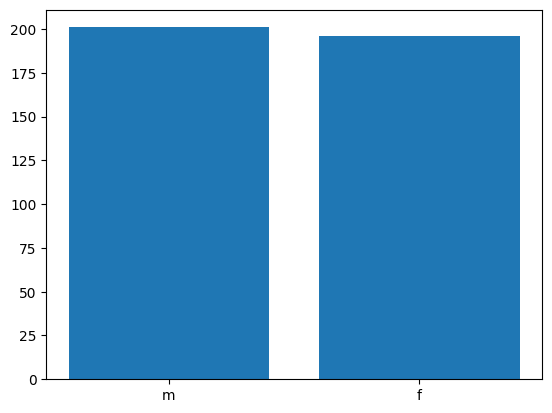

In [72]:
plt.bar(gen.index, gen.values)

<ipython-input-73-6e5cf4018ccf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gen.index, y=gen.values, palette="viridis")


<Axes: xlabel='None'>

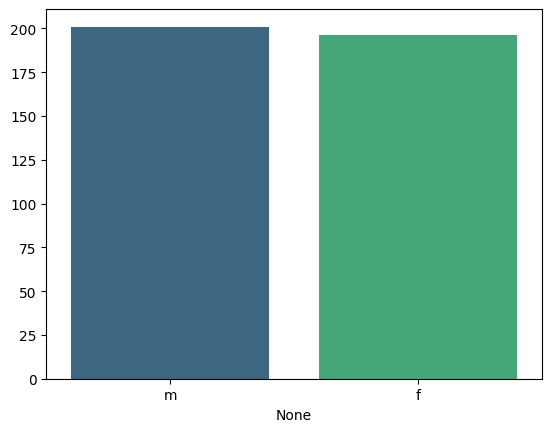

In [73]:
sns.barplot(x=gen.index, y=gen.values, palette="viridis")

Barras agrupadas

In [74]:
actividad_1['FAM_STATUS'] = pd.cut(actividad_1['WAGE'], 2, labels=['single', 'married'])

<ipython-input-74-6f109747a7a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actividad_1['FAM_STATUS'] = pd.cut(actividad_1['WAGE'], 2, labels=['single', 'married'])


In [75]:
actividad_1['FAM_STATUS']

0      single
1      single
2      single
3      single
4      single
        ...  
522    single
523    single
524    single
525    single
527    single
Name: FAM_STATUS, Length: 397, dtype: category
Categories (2, object): ['single' < 'married']

In [79]:
pivot = actividad_1.pivot_table(values='WAGE',
                 index='FAM_STATUS',
                 columns='GENDER',
                 aggfunc='mean').stack().to_frame().reset_index().rename(columns={0:'mean_wage','GENDER':'gender'})

In [80]:
pivot

,FAM_STATUS,gender,mean_wage
0,single,female,4.339741
1,single,male,6.310374
2,married,female,15.860000
3,married,male,18.283571


<Axes: xlabel='FAM_STATUS', ylabel='mean_wage'>

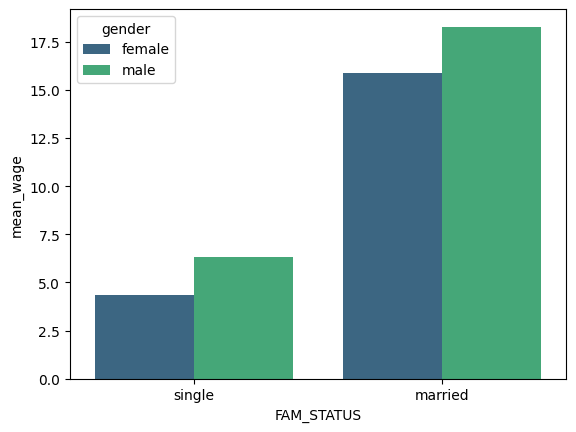

In [81]:
sns.barplot(data=pivot, x='FAM_STATUS',y='mean_wage',hue='gender',palette="viridis")

Heatmaps

<Axes: >

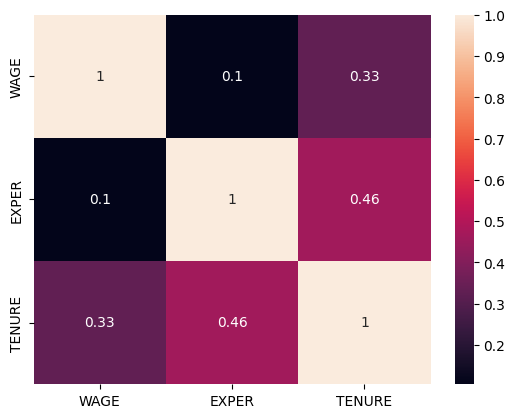

In [85]:
#esto también es conocido como correlograma
df = actividad_1[['WAGE','EXPER','TENURE']]
sns.heatmap(df.corr(), annot=True)

In [86]:
actividad_1

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,single,2
1,3.50,2,female,single,0
2,3.30,5,female,single,0
3,5.00,15,male,single,5
4,11.25,28,male,single,25
...,...,...,...,...,...
522,6.46,27,male,single,0
523,2.90,1,male,single,2
524,3.25,14,female,single,2
525,7.63,8,female,single,4


distribución

<Axes: xlabel='WAGE', ylabel='Count'>

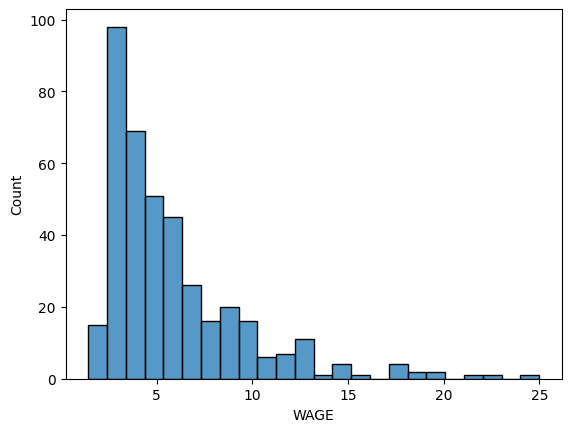

In [87]:
sns.histplot(x=actividad_1['WAGE'])

<Axes: xlabel='WAGE', ylabel='Count'>

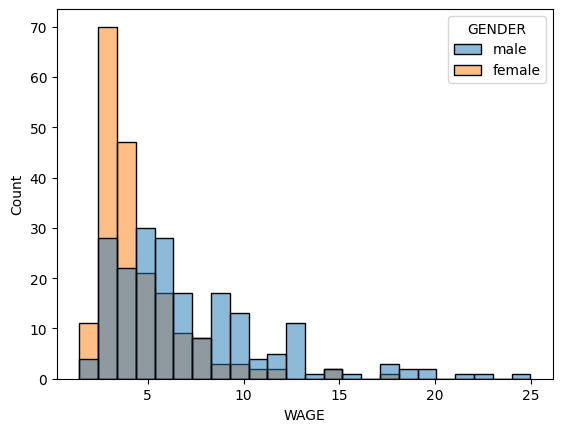

In [88]:
sns.histplot(data=actividad_1, x='WAGE', hue='GENDER')

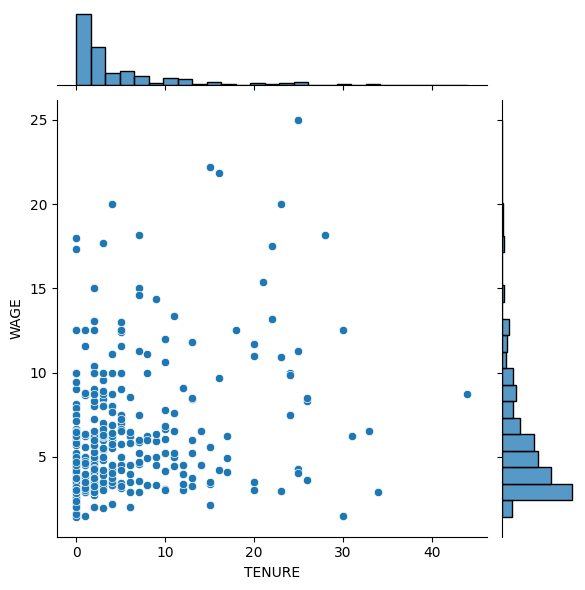

In [89]:
sns.jointplot(y=df['WAGE'],x=df['TENURE'])

<ipython-input-90-34299be3bb77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENDER'] = actividad_1['GENDER']


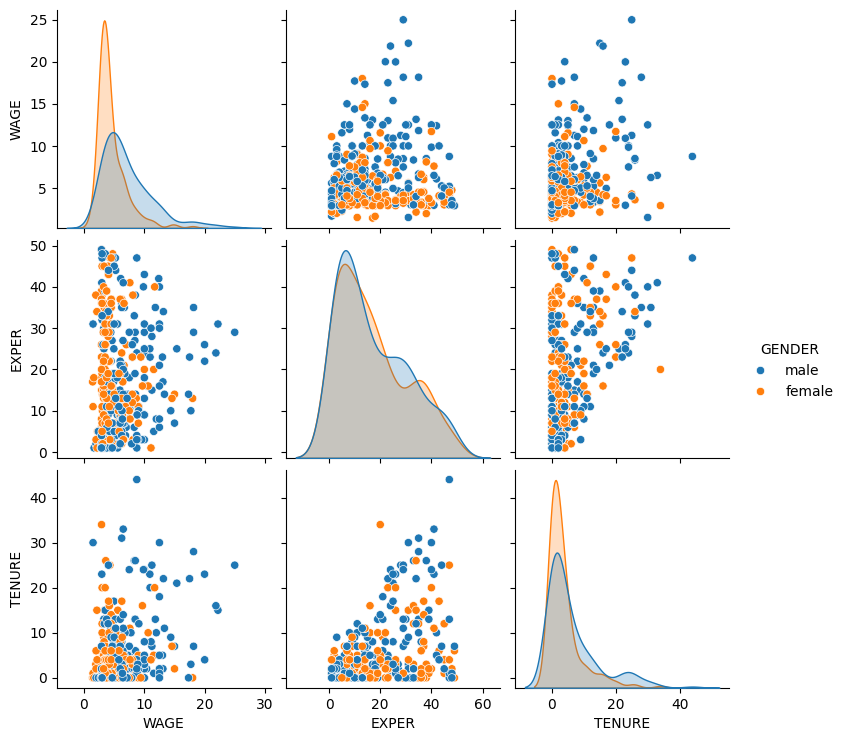

In [90]:
#esto es también conocido como correlograma
df['GENDER'] = actividad_1['GENDER']
sns.pairplot(df, hue='GENDER')

<Axes: xlabel='FAM_problems', ylabel='WAGE'>

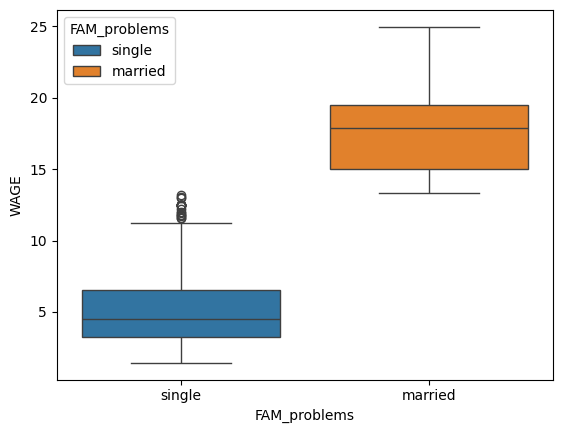

In [ ]:
sns.boxplot(data=actividad_1, x='FAM_problems', y='WAGE', hue='FAM_problems')